***

# Project 2 - Numerical Integration

***

Leonie English 

March-April 2024

University of Manchester

***

## Introduction to numerical Integration

Initialising Python interpreter:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import matplotlib.animation as animation
from matplotlib.widgets import Button, Slider

plt.rcParams.update({'font.size' : 12})
plt.style.use('default')

In this project, the method of numerical integration will be tested against analytic integration. 

Analytical integration is the method that is perhaps most common when solving a differential equation, and is primarily what would be used when calculating by hand, for example, $\frac{dy}{dx}=7x+1$ can be solved analytically through integration, and can be evaluated at a certain point by changing the limits of the integrals:

$$
\begin{align}
\\ dy = (6x + 1)dx \\ 
\int dy = \int (6x + 1)dx 
\\ y = 3x^2 + x + C \\
\end{align} 
$$

Numerical integration differs to this approach, in that it is purely an approximation of the solution. $\frac{dy}{dx}$ is the gradient of the function, y, and so using the defintion of a derivative; for each step $h = \delta x$ in $x$, the integral changes by:

$$
\begin{align}
\delta y = \frac{dy}{dx}\delta x = h \frac{dy}{dx}
\end{align}
$$

Any step $h$ can be taken, however, as $h$ changes, the approximation generally becomes worse or better compared to its analytical counterpart, as demonstrated by the code below.

In [2]:
def numerical_integral(upper_limit, initial_value, step_size):
    """
    Calculates a numerical integral for a 1D system in x and y.
    
    Parameters:
    upper_limit (float): Upper limit of integration.
    initial_value (float): Lower limit of integration.
    step_size (float): Step size used in integration.
    
    Returns:
    y_integral (float): Final step integral value.
    y_integral_values (numpy array, floats): Array of integral values at each step.
    """
    
    y_integral = initial_value
    
    y_integral_values = np.array([0])
    
    for x in np.arange(0, upper_limit, step_size):
        y_integral = y_integral + (7*x + 1) * step_size
        y_integral_values = np.append(y_integral_values, y_integral)
        
    return y_integral, y_integral_values

# Defining the upper limit of integration
final_x = 10.0

# Defining step size
h_1 = 0.01
h_2 = 0.1
h_3 = 1


h_1_numerical, h_1_integral_values = numerical_integral(final_x, 0, h_1)
h_2_numerical, h_2_integral_values = numerical_integral(final_x, 0, h_2)
h_3_numerical, h_3_integral_values = numerical_integral(final_x, 0, h_3)

y_analytical = 3*(final_x)**2 + (final_x)

print('The numerical integral is {:.4g} for h = 0.01, {:.4g} for h = 0.1, and {:.4g} for h = 1.'.format(h_1_numerical, h_2_numerical, h_3_numerical))
print('The analytical integral is {:.3g}.'.format(y_analytical))

The numerical integral is 359.7 for h = 0.01, 356.5 for h = 0.1, and 325 for h = 1.
The analytical integral is 310.


Plotting these results:

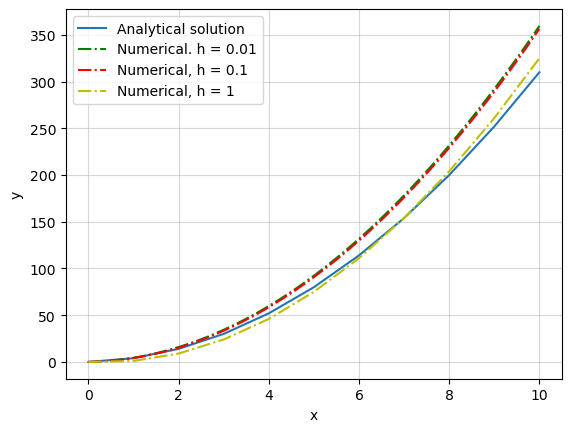

In [3]:
def plot_fn(stepsize1, stepsize2, stepsize3, y_stepsize1, y_stepsize2, y_stepsize3):
    """
    Plotting function solely for plotting the analytical and numerical solutions to the example problem, with different
    stepsizes.
    
    Parameters:
    stepsize(1-3) (float): Step size of numerical integration.
    y_stepsize(1-3) (numpy array, floats): Array of integrated values corresponding to respective stepsize.
    
    Returns:
    None
    """
    # Creating an x-axis solely for plotting
    x_1 = np.arange(0, 10+stepsize1,stepsize1)
    x_2 = np.arange(0, 10+stepsize2,stepsize2)
    x_3 = np.arange(0, 10+stepsize3,stepsize3)
    # Creating analytical values corresponding to x
    y_ana = 3 * x_3**2 + x_3 
    plt.plot(x_3, y_ana, label='Analytical solution')
    plt.plot(x_1, y_stepsize1, '-.g', label='Numerical. h = 0.01')
    plt.plot(x_2, y_stepsize2, '-.r', label='Numerical, h = 0.1')
    plt.plot(x_3, y_stepsize3, '-.y', label='Numerical, h = 1')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(alpha=0.5)
    return None

plot_fn(h_1, h_2, h_3, h_1_integral_values, h_2_integral_values, h_3_integral_values)

It is seen that the code above does not agree with any linear relationship of increase or decrease of $h$. Therefore, it is deduced that fine tuning the value of $h$ will ensure a better approximation of the analytical integral. The optimal value of $h$ depends on if the solution is changing rapidly or slowly. There are different methods present to find the optimal value of $h$, and indeed, to find the numerical solution - all methods differ in each aspect. The methods that will be described in this project are: Euler's method, improved Euler's method, Verlet's method, and the Euler-Cromer method. 

***

## Spring-mass system

The system that will be analysed using numerical integration is the spring-mass system, which is subjected to an external force. This can be described by a differential equation, $m\ddot{x}(t)+b\dot{x}(t)+kx(t)=F(t)$, where $m$ is the mass, kg, $b$ is the damping factor, $\mathrm{kgs^{-1}}$, $k$ is the spring constant, $\mathrm{Nm^{-1}}$, $x$ is the position of the system, m, and $F$ is the external force, N. The dots on top of $x$ correspond to the derivatives of $x$ with respect to time, $t$, s.

The spring-mass system is first defined by set parameters, mass, $m$, is $2.47\mathrm{kg}$, and the spring constant, $k$, is given by $1.15\mathrm{kgs^{-2}}$. These parameters are then put into the program by defining them as global variables, using capital letters to distinguish them as global variables.

In [4]:
# Defining the mass, kg
MASS = 2.47

# Defining the spring constant, kgs^-2
SPRING_CONSTANT = 1.15

An initial assumption is made about the spring-mass system; $F(t) = 0\,\mathrm{N}$, so there is no external force exerted on the system. *The case where $F(t)\neq 0$ will be considered after considering each method of numerical integration for $F(t)=0$.*
The parameter, $b$ (damping factor), will take a range of values, to show the effects of different levels of damping on a system. This will only be done for the most accurate method of numerical integration.

The spring-mass system has an equation of motion according to $m\ddot{x}=-b\dot{x}-kx$, due to the external force term being removed. Velocity, $v$, $\mathrm{ms^{-1}}$ is $\dot{x}$, the first time derivative of $x$, and acceleration, $a$, $\mathrm{ms^{-2}}$, is $\ddot{x}$, the second time derivative of $x$.

## Analytical solution to the damped harmonic oscillator - no external force

The analytic solution for the damped harmonic oscillator with no damping force is derived by considering the physics of the system, and this will be considered for light/heavy damping, and in the case of critical damping. The expressions for each are slightly different. 

**The case of light and heavy damping**

Consider the system that has already been defined, and the expression for the acceleration,

$$
\ddot{x}_i = -\frac{k}{m}x_i - \frac{b}{m}\dot{x}_i\,.
$$

This is a second order linear ODE, and its ampltiude is expected to decay over time. An ansatz is made, and the solution is guessed to be of the form $x=x_0e^{-\epsilon t}$, where $\epsilon$ is an arbitrary constant to be determined, $x_0$ is the initial position, m, and $k$ and $t$ retain their usual meanings. This solution is then substituted into the above equation to obtain an equation which is quadratic in $\epsilon$. This can then be solved to obtain the possible values for $\epsilon$,

$$
\epsilon_1, \epsilon_2 = \frac{b\pm\sqrt{b^2-4mk}}{2m}\,.
$$

Light damping occurs when $b < 2\sqrt{km}$, $\mathrm{rads^{-1}}$, heavy damping occurs when $b > 2\sqrt{km}$. Critical damping occurs when $b = 2\sqrt{km}$. Light damping will see the oscillations slowly decay, heavy damping will see the amplitude decay before any can occur, and critical damping will see a small period of oscillation, with the amplitude going to zero soon after.

In [5]:
# Coding the case for critical damping for later use
critical_damping = np.sqrt(4*MASS*SPRING_CONSTANT)

From writing $\sqrt{b^2-4mk}$ as the complex root, $i\sqrt{4mk-b^2}$, it is ensured that in the case of light damping, the term inside the square root is not complex (the real part needs to be chosen). The solution can then be written as

$$
x = \left(exp\left(\frac{-bt}{2m}\right)\right)\left(A\,exp\left(\frac{it\sqrt{4km-b^2}}{2m}\right)+B\,exp\left(\frac{-it\sqrt{4km-b^2}}{2m}\right)\right)\,,
$$

where $A$ and $B$ are arbitrary constants to be determined. $A$ and $B$ must be chosen as to make the solution, $x$, real, as a complex position cannot exist. The initial conditions of the problem must also be used when solving for $A$ and $B$.

**Critical Damping**

Critical damping happens when $\omega_0=b\,/\,2m$. The solution then follows on from light/heavy damping, but becomes less complicated,

$$
    x(t)=A\,exp\left(-\frac{b}{2m}t\right)+B\,t\,exp\left(-\frac{b}{2m}t\right),
$$

where $A$ and $B$ are again two arbitrary constants to be determined by boundary conditions of the system, $x(0)$ and $v(0)$.

Below is a code block containing functions that calculate the solution, $x(t)$.

In [6]:
def analytic_sol(x_initial, v_initial, time, b):
    """
    Calculates the analytical solution of the spring mass system when the damping corresponds to light or heavy damping.
    
    Parameters:
    x_initial (float): Initial position, m
    v_initial (float): Initial velocity, m/s
    time (float): Time, s
    b (float): Damping constant, kg/s
    
    Returns:
    X: Solution of the damped oscillator equation at a particular time.
    """
    A = (b/(2*1j*cmath.sqrt(4*SPRING_CONSTANT*MASS-b**2))+1/2)*x_initial+v_initial*MASS/(cmath.sqrt(4*SPRING_CONSTANT*MASS-b**2)*1j) 
    B = x_initial-A
    
    X = np.exp(-b*time/(2*MASS))*(A*np.exp(1j*cmath.sqrt(4*SPRING_CONSTANT*MASS-b**2)*time/(2*MASS))
                              +B*np.exp(-1j*cmath.sqrt(4*SPRING_CONSTANT*MASS-b**2)*time/(2*MASS)))
    return X


def analytic_sol_critical(x_initial, v_initial, time, b):
    """
    Calculates the analytical solution of the spring mass system when the damping corresponds to critical damping.
    
    Parameters:
    x_initial (float): Initial position, m
    v_initial (float): Initial velocity, m/s
    time (float): Time, s
    b (float): Damping constant, kg/s
    
    Returns:
    X: Solution of the damped oscillator equation at a particular time.
    """
    A = x_initial
    B = (b / (2*MASS)) * x_initial + v_initial
    X = ( A*np.exp((-b/(2*MASS))*time) ) + ( B*time*np.exp((-b/(2*MASS))*time) ) 
    return X

## Methods of numerical integration

In this section, four different methods of numerical integration will be tested for the spring-mass system.

## Euler's method

Euler's method is a first-order numerical solution to differential equations, first-order meaning that the square of the step size is proportional to the error per step. The general idea behind the method is to take steps, $i$ being the number of steps, along the tangent of the curve. Although the curve is unknown, it is assumed that an initial value is known to be the start of the curve. The tangent to the curve at this initial point is calculated by using the differential equation. Further steps are taken, assuming the point at the end of the first tangent, with length on the x-axis $h$, is also part of the curve. Once $i$ steps are taken, a polygonal curve is produced. The approximation given by Euler's method is most accurate whenever $h$, the step size, is small. 

Displayed below is a visual representation of what Euler's method is doing, for a simple differential equation:

In [7]:
plt.rcParams["animation.html"] = "jshtml"

def euler(function, x_val, y_val, hstep):
    """
    Euler's method for approximating solutions of ODEs.
    
    Parameters:
    function (float): The function to be solved.
    x_val (float): The x-value of the point.
    y_val (float): The y-value of the point.
    hstep (float): The step size.

    Returns:
    float: The y-value of the next point.
    """
    return y_val + hstep * function(x_val, y_val)

def f(x_val, y_val):
    """
    The differential equation to be solved.
    
    Parameters:
    x_val (float): The x-value of the point.
    y_val (float): The y-value of the point.

    Returns:
    float: The derivative at the point (x, y).
    """
    return y_val

def analytical(x_val):
    """
    The analytical solution of the differential equation.
    
    Parameters:
    x_val (float): The x-value of the point.

    Returns:
    float: The y-value of the point.
    """
    return np.exp(x_val)

def init(ax, line, tangent_line, analytical_line, dot, vertex_dot):
    """
    Initialization function for the animation.
    
    Parameters:
    ax (matplotlib.axes.Axes): The axes object.
    line (matplotlib.lines.Line2D): The line object for the solution curve.
    tangent_line (matplotlib.lines.Line2D): The line object for the tangent line.
    analytical_line (matplotlib.lines.Line2D): The line object for the analytical solution.
    dot (matplotlib.lines.Line2D): The dot object for the Euler's method steps.
    vertex_dot (matplotlib.lines.Line2D): The dot object for the vertices of the polygonal curve.

    Returns:
    tuple: The line objects to be plotted.
    """
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 8)
    ax.legend()
    return line, tangent_line, analytical_line, dot, vertex_dot

def update(index, x_array, y_array, line, tangent_line, analytical_line, dot, vertex_dot):
    """
    Animation update function.
    
    Parameters:
    index (int): The current frame of the animation.
    x_array (array): The x-values of the points.
    y_array (array): The y-values of the points.
    line (matplotlib.lines.Line2D): The line object for the solution curve.
    tangent_line (matplotlib.lines.Line2D): The line object for the tangent line.
    analytical_line (matplotlib.lines.Line2D): The line object for the analytical solution.
    dot (matplotlib.lines.Line2D): The dot object for the Euler's method steps.
    vertex_dot (matplotlib.lines.Line2D): The dot object for the vertices of the polygonal curve.

    Returns:
    tuple: The updated line objects.
    """
    line.set_data(x_array[:index+1], y_array[:index+1])
    dot.set_data(x_array[index], y_array[index])
    vertex_dot.set_data(x_array[:index], y_array[:index])
    if index > 0:
        tangent_line.set_data([x_array[index-1], x_array[index]], [y_array[index-1], y_array[index]])
    return line, tangent_line, analytical_line, dot, vertex_dot

def run_animation():
    """
    Function to create the plot and data, and start the animation.
    
    Returns:
    matplotlib.animation.FuncAnimation: The animation object.
    """
    y_initial = 1.0
    h = 0.1
    x = np.arange(0, 2, h)
    y = np.zeros_like(x)
    y[0] = y_initial

    for i in range(1, len(x)):
        y[i] = euler(f, x[i-1], y[i-1], h)

    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    line, = ax.plot([], [], 'r-', label='Euler')
    tangent_line, = ax.plot([], [], 'b-')
    analytical_line, = ax.plot(x, analytical(x), 'g-', label='Analytical')
    dot, = ax.plot([], [], 'bo')
    vertex_dot, = ax.plot([], [], 'ro')

    ani = animation.FuncAnimation(fig, update, frames=len(x), init_func=lambda: init(ax, line, tangent_line, analytical_line, dot, vertex_dot), fargs=(x, y, line, tangent_line, analytical_line, dot, vertex_dot), blit=True)
    plt.close()
    return ani

In [8]:
run_animation()

Applying Euler's method to the equation of motion of the spring-mass system, 

$$
x_{i+1}= x_i + h \cdot v_i \\
v_{i+1}= v_i + h \cdot a_i
$$

where $i$ is the number of steps, $h$ is the step size, and all the other symbols retain their usual meaning. The acceleration can be calculated by rearranging the equation of motion for $a_i$ as follows,

$$
a_i = -\frac{k}{m}x_i - \frac{b}{m}v_i\,.
$$

The results of $x(t)$ from the numerical method are plotted against time, $t$, and velocity against position is plotted.

For hstep = 0.005, at time T = 200s, x = -0.285m, v = 0.168ms^-1.
For hstep = 0.010, at time T = 200s, x = -0.357m, v = 0.214ms^-1.
For hstep = 0.050, at time T = 200s, x = -2.282m, v = 1.393ms^-1.
For hstep = 0.090, at time T = 200s, x = -15.549m, v = 8.240ms^-1.


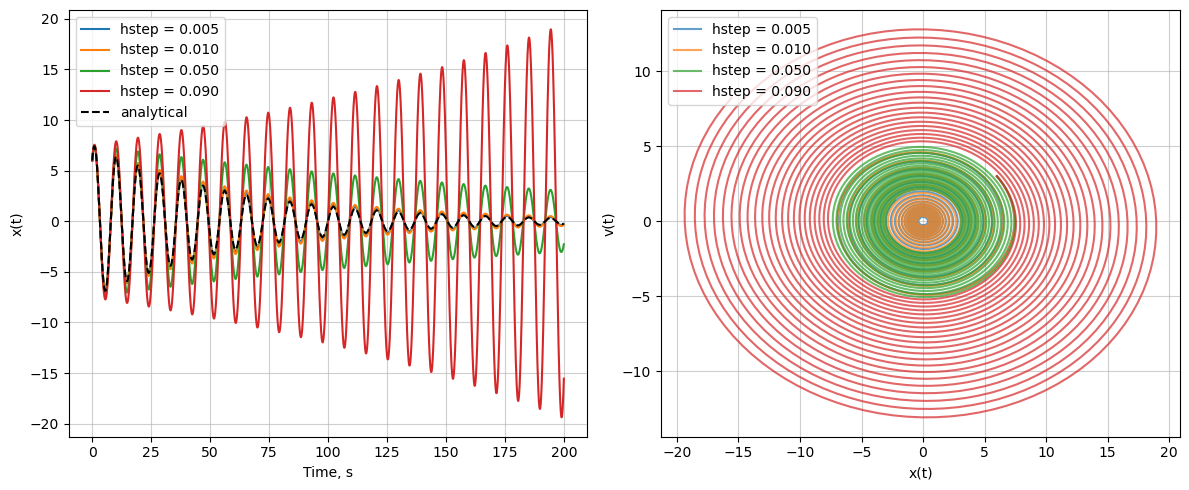

The analytical solution, at time T = 200s, predicts x = -0.230m.


In [9]:
def eulers_method(x_0, v_0, step_iterations, stepsize, SPRING_CONSTANT, MASS, damping_constant):
    """
    Function that runs Euler's method of numerical integration. A for loop is used to calculate accleration at the ith step,
    and for each step, i, the later step in i+1 is calculated, for both x, m and v, m/s. A tuple of the position array
    and velocity array is returned, along with the last value in each array, which is the estimated solution at the final
    time, which can be equated to the upper limit of analytical integration.
    
    Parameters:
    x_0 (float): The initial x-value of the system, m.
    v_0 (float): The initial velocity of the system, m/s.
    step_iterations (int): The number of steps to be performed in Euler's method.
    stepsize (float): The size of each step in Euler's method.
    SPRING_CONSTANT (float): The spring constant of the system, N/m.
    MASS (float): The mass of the object in the system, kg.
    damping_constant (float): The damping constant of the system, kg/s.

    Returns:
    (x, v) (tuple): Contains the x and v arrays corresponding to position, m, and velocity, m/s, at each step within the 
                    time range.
    last_value_x (float): The last value in the position array, which is the estimated position at the final time.
    last_value_v (float): The last value in the velocity array, which is the estimated velocity at the final time.
    e (array, float): The energy array of the system.
    """
    x = np.zeros(step_iterations)
    v = np.zeros(step_iterations)
    e = np.zeros(step_iterations)
    
    x[0] = x_0
    v[0] = v_0
    e[0] = ((1/2) * SPRING_CONSTANT * x_0**2) + ((1/2) * MASS * v_0**2) 
    
    for i in range(step_iterations - 1):
        
        # Calculate the acceleration, m/s^2 at the ith step
        acceleration = (-(SPRING_CONSTANT/MASS)*x[i]) - ((damping_constant/MASS)*v[i])
        
        # For each i, the later step in i+1 is calculated, for both x, m, and v, m/s.
        x[i + 1] = x[i] + v[i]*stepsize
        v[i + 1] = v[i] + acceleration*stepsize
        
        e[i + 1]= e[i] * (1 + (SPRING_CONSTANT/MASS)*stepsize**2)
        
        last_value_x = x[-1]
        last_value_v = v[-1]
        
    return (x, v), last_value_x, last_value_v, e

# Define damping constant, b, kg/s
b = 0.08

# Define range of step sizes, h, in s
h_tuple = (0.005, 0.01, 0.05, 0.09)

# Choose initial parameters, v(0), x(0)
v_0 = 3
x_0 = 6

# hoose how long we are integrating for, s
T = 200

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for hstep in h_tuple:
    nsteps = int(T/hstep)
    
    (x, v), last_x, last_v, _ = eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
    
    ax1.plot(np.linspace(0, T, nsteps), x, label=f"hstep = {hstep:.3f}")
    
    ax2.plot(x, v, label=f"hstep = {hstep:.3f}", alpha=0.7)
    
    # Prints the last value of each x and v array, as this is the solution at T
    print(f"For hstep = {hstep:.3f}, at time T = {T}s, x = {last_x:.3f}m, v = {last_v:.3f}ms^-1.")

# Plots the analytical solution within the same time range as the numerical method
ax1.plot(np.arange(0, T, hstep), analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real, 'k--', label="analytical" )

ax1.legend(loc='upper left')
ax1.set_xlabel('Time, s')
ax1.set_ylabel('x(t)')
ax1.grid(alpha=0.6)

ax2.legend(loc='upper left')
ax2.set_xlabel('x(t)')
ax2.set_ylabel('v(t)')
ax2.grid(alpha=0.6)

plt.tight_layout()
plt.show()

print(f"The analytical solution, at time T = {T}s, predicts x = {analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real[-1]:.3f}m.")

The red line displays oscillations increasing with time, when the system is lightly damped - this is not physically possible (unless $F\neq0!$), so we can determine when the step size becomes too high, the numerical solution starts to break down. When $h = 0.005$, the numerical solution ended up being the most accurate, so it can be inferred that a low step size will provide the most accurate solution. It is worth noting that the lower the value of step size, the higher the computation time, therefore a delicate balance must be struck.

The step size $h=0.005$ seems plausible, so it will continue to be used throughout the rest of this section.

In [10]:
NATURAL_FREQUENCY = np.sqrt(SPRING_CONSTANT / MASS)

print(f'In this system, the natural frequency, the value k/m, is {NATURAL_FREQUENCY:.3f} rads^-1.')

In this system, the natural frequency, the value k/m, is 0.682 rads^-1.


In Euler's method, energy and phase can 'drift' over time, away from the true solution. Energy conservation is not an inherent part of Euler's method, and if the equations it is using are looked at again,

$$
x_{i+1}= x_i + h \cdot v_i \\
v_{i+1}= v_i + h \cdot a_i\,,
$$

it can be seen that there is asymmetry in updating position and velocity. As Euler's method updates the the position, it is updated using a different velocity to that calculated directly by Euler's method, which clearly leads to an energy error, as velocity and position are directly related to kinetic energy and potential energy respectively.

**Energy in Euler's method**

Quantifying this, if we consider the energy which is the sum of kinetic and elastic potential energy,

$$
E_{i+1} = \frac{1}{2}kx_{i+1}^2+\frac{1}{2}mv_{i+1}^2, 
$$

the Euler equations can be directly substituted to obtain 

$$
E_{i+1} = \frac{1}{2}k(x_i+hv_i)^2+\frac{1}{2}m(v_i+ha_i)^2.
$$

The acceleration defined using the equation of motion can be substituted in, and the equation rearranges to give

$$
E_{i+1}=E_i(1+\frac{k}{m}h^2).
$$

This confirms the notion that Euler's method predicts an increasing energy - the energy of the previous step, $E_i$, will always have a factor of $E_i$ added on. This energy is not dependent on damping. This is plotted below.

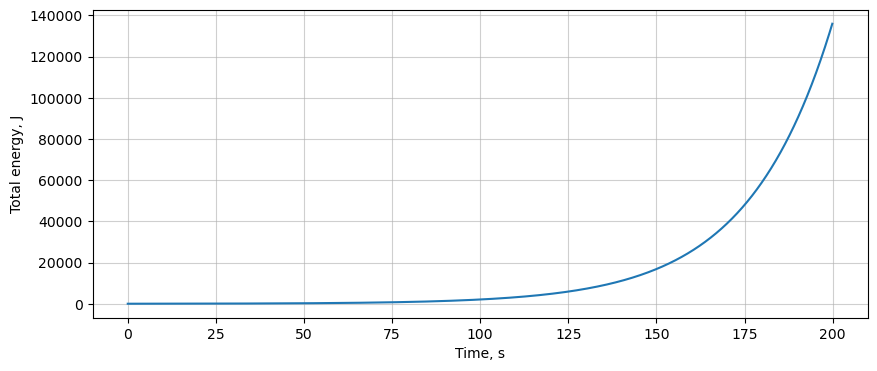

In [11]:
# Define step size
h = 0.05

nsteps = int(T/hstep)

# Define damping constant, b, kg/s
b = 0

fig, ax1 = plt.subplots(figsize=(10, 4))

(x, v), last_x, last_v, energy_array = eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)

ax1.plot(np.arange(0, T, hstep)[:-1], energy_array)
ax1.grid(True, alpha=0.6)
ax1.set_xlabel('Time, s')
ax1.set_ylabel('Total energy, J')
plt.show()

The energy of the system is definitely not conserved, and increases according to a square term with time. This means Euler's method is a non-symplectic integrator, meaning, energy is not conserved.

## Improved Euler's method

Euler's method can easily be improved through extending the Taylor expansion for the derivative to another term. It is not always easy to do this, but in this system it is simple. The second derivative of the position is by definition acceleration, and the equations used for the improved Euler's method become

$$
x_{i+1}=x_i+hv_i+\frac{h^2a_i}{2}, \\
v_{i+1}=v_i+ha_i, \\
a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i. \\
$$

This method can be graphically displayed using the following code:

For hstep = 0.005, at time T = 200s, x = -0.254m, v = 0.149ms^-1.
For hstep = 0.010, at time T = 200s, x = -0.284m, v = 0.168ms^-1.
For hstep = 0.050, at time T = 200s, x = -0.701m, v = 0.435ms^-1.
For hstep = 0.090, at time T = 200s, x = -1.791m, v = 1.080ms^-1.


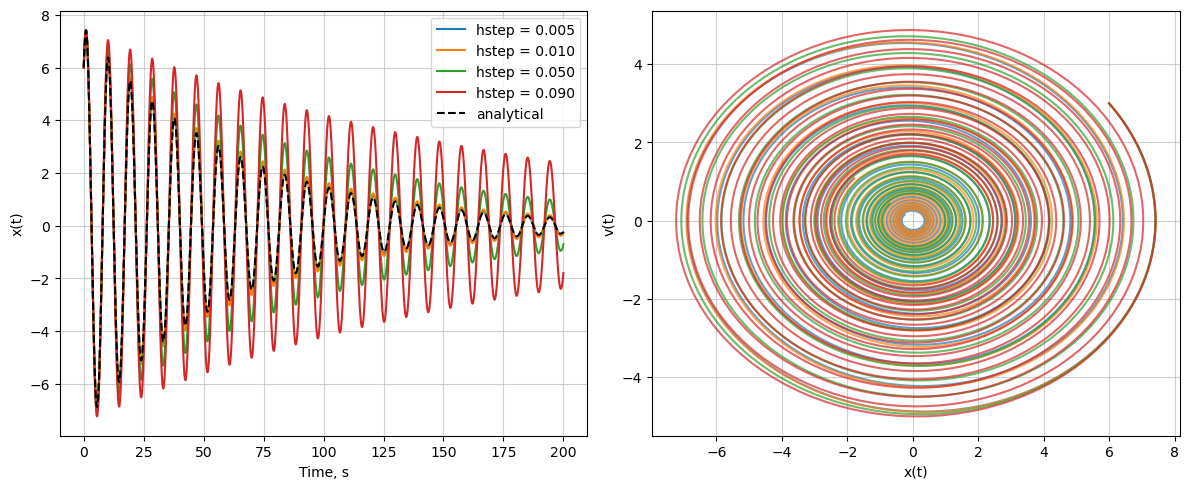

The analytical solution, at time T = 200s, predicts x = -0.230m.


In [12]:
def improved_eulers_method(x_0, v_0, step_iterations, stepsize, SPRING_CONSTANT, MASS, damping_constant):
    """
    Function that runs the improved Euler's method of numerical integration. A for loop is used to calculate acceleration at
    the ith step, and for each step, i, the later step in i+1 is calculated, for both x, m and v, m/s. A tuple of the 
    position array and velocity array is returned, along with the last value in each array, which is the estimated solution
    at the final time, which can be equated to the upper limit of analytical integration. The difference from Euler's
    method is the additional acceleration term in x_{i+1}.
    
    Parameters:
    x_0 (float): The initial x-value of the system, m.
    v_0 (float): The initial velocity of the system, m/s.
    step_iterations (int): The number of steps to be performed in the Euler's method.
    stepsize (float): The size of each step in the Euler's method.
    SPRING_CONSTANT (float): The spring constant of the system, N/m.
    MASS (float): The mass of the object in the system, kg.
    damping_constant (float): The damping constant of the system, kg/s.

    Returns:
    (x, v) (tuple): Contains the x and v arrays corresponding to position, m, and velocity, m/s, at each step within the 
                    time range.
    last_value_x (float): The last value in the position array, which is the estimated position at the final time.
    last_value_v (float): The last value in the velocity array, which is the estimated velocity at the final time.
    e (array, float): The energy array of the system.
    """    
    x = np.zeros(step_iterations)
    v = np.zeros(step_iterations)
    e = np.zeros(step_iterations)
    
    x[0] = x_0
    v[0] = v_0
    e[0] = ((1/2) * SPRING_CONSTANT * x_0**2) + ((1/2) * MASS * v_0**2) 
    
    for i in range(step_iterations - 1):
        acceleration = (-(SPRING_CONSTANT/MASS)*x[i]) - ((damping_constant/MASS)*v[i])
        
        x[i + 1] = x[i] + v[i]*stepsize + (stepsize**2 * acceleration) / 2
        v[i + 1] = v[i] + acceleration*stepsize
        
        last_value_x = x[-1]
        last_value_v = v[-1]
        
        e[i + 1] = ((1/2) * acceleration * stepsize**2 * SPRING_CONSTANT * x[i]
                   ) + ((1/2)*MASS*((acceleration*stepsize+v[i])**2)) +((1/2)*stepsize**2*SPRING_CONSTANT*v[i]**2) + (
            stepsize*SPRING_CONSTANT*v[i]*x[i]) + (
            (SPRING_CONSTANT*x[i]**2)/2) + ((1/8)*acceleration**2*stepsize**4*SPRING_CONSTANT) + ((1/2)*acceleration*stepsize**3*SPRING_CONSTANT*v[i])
        
        
        
    return (x, v), last_value_x, last_value_v, e

# Define damping constant, b, kg/s
b = 0.08

# Define range of step sizes, h, in s
h_tuple = (0.005, 0.01, 0.05, 0.09)

# Choose how long we are integrating for, s
T = 200

# Create a subplot to display 2 figures side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# define nsteps
for hstep in h_tuple:

    nsteps = int(T/hstep)
    
    (x, v), last_x, last_v, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
    
    # Plots a graph of position against time for each iteration of the numerical solution
    ax1.plot(np.linspace(0, T, nsteps), x, label=f"hstep = {hstep:.3f}")
    
    # Plots a graph of velocity against position
    ax2.plot(x, v, label=f"hstep = {hstep:.3f}", alpha=0.7)
    
    # Prints the last value of each x and v array, as this is the solution at T
    print(f"For hstep = {hstep:.3f}, at time T = {T}s, x = {last_x:.3f}m, v = {last_v:.3f}ms^-1.")

    
ax1.plot(np.arange(0, T, hstep), analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real, 'k--', label="analytical" )

ax1.legend()
ax1.set_xlabel('Time, s')
ax1.set_ylabel('x(t)')
ax1.grid(alpha=0.6)

ax2.set_xlabel('x(t)')
ax2.set_ylabel('v(t)')
ax2.grid(alpha=0.6)

plt.tight_layout()
plt.show()

print(f"The analytical solution, at time T = {T}s, predicts x = {analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real[-1]:.3f}m.")

It can be seen that every solution in the second-order Euler's method is a lot closer to the analytical solution compared to the first-order Euler's method. 

This is certainly a better numerical algorithm to solve the differential equation, however, the same issue persists. Energy is once again not conserved.

**Energy in improved Euler's method**

The energy can be calculated in the same method as Euler's method, by substiuting the equations used into the expression for total energy,

$$
E_{i+1} = \frac{1}{8}a^2h^4k+\frac{1}{2}ah^3kv+\frac{1}{2}a_ih^2kx_i+\frac{1}{2}m(a_ih+v_i)^2+\frac{1}{2}h^2kv_i^2+hkv_ix_i+\frac{kx_i^2}{2}.
$$

This is coded in, and plotted against time to display this energy relationship.

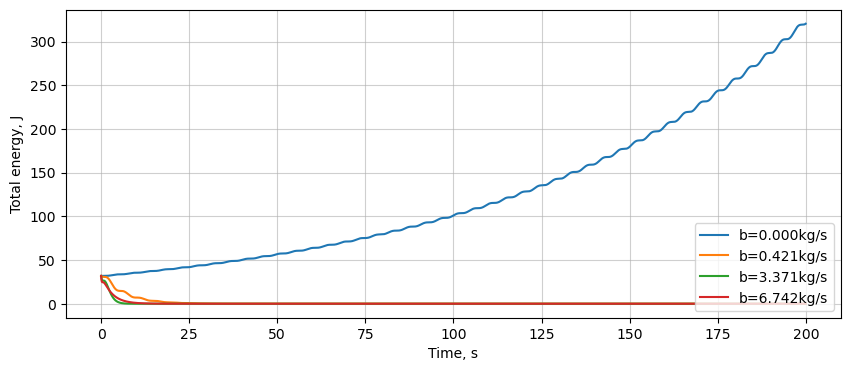

In [13]:
# Define the step size, h
hstep = 0.05

nsteps = int(T/hstep)

b_array = [0, critical_damping / 8, critical_damping, critical_damping * 2]

fig, ax1 = plt.subplots(figsize=(10, 4))

for b in b_array:
    _, _, _, energy_array = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)

    ax1.plot(np.arange(0, T, hstep), energy_array, label=f'b={b:.3f}kg/s')
ax1.grid(True, alpha=0.6)
ax1.set_xlabel('Time, s')
ax1.set_ylabel('Total energy, J')
ax1.legend(loc='lower right')
plt.show()

This clearly shows that the improved Euler's method is not conserving energy either in the case of $b=0$. The energy also increases with time in this scenario, but slightly oscillates as it is increasing. This is due to the extra added term. The energy is quite a good estimate in the case of critical and heavy damping, but behaves badly for light damping. 

## Verlet's method

Some method which does not produce any time asymmetry is needed - and one which can take other properties of the system into account, such as time reversibility. This problem can be solved through introducing a centred derivative, 

$$
x'(t)= \lim_{h\to0} \frac{x(t+h)-x(t-h)}{2h}.
$$

Two Taylor expansions can be taken in order to approximate the solution in the limit $h\rightarrow0$, for $x(t+h)$ and $x(t-h)$. These can be subtracted and rearranged to obtain an approximation for $\dot{x}(t)$ and $\ddot{x}(t)$. 

Implementing this into the damped oscillatory system used throughout this notebook,

$$
v_i = \frac{x_{i+1}-x_{i-1}}{2h}+\mathcal{O}\,(h^2) \\
a_i = \frac{x_{i+1}+x_{i-1}-2x_i}{h^2}+\mathcal{O}\,(h^2) \\
a_i = -\frac{k}{m}x_i - \frac{b}{m}v_i.
$$

The second expression can be rearranged, and these equations combine to give

$$
x_{i+1}=Ax_i+Bx_{i-1},
$$

where

$$
A = 2\frac{(2m-kh^2)}{2m+bh}, \\ \\ B = \frac{(bh-2m)}{2m+bh}.
$$

Verlet's method is not more computationally expensive than Euler's method, which provides it with a significant advantage when used for complicated systems. An obvious issue that exists in this method is that there is no information about the position $x_{i-1}$, meaning we need to use some other more simple algorithm for the very first step. The improved Euler's method will be used for this step. Implementing Verlet's method into code:

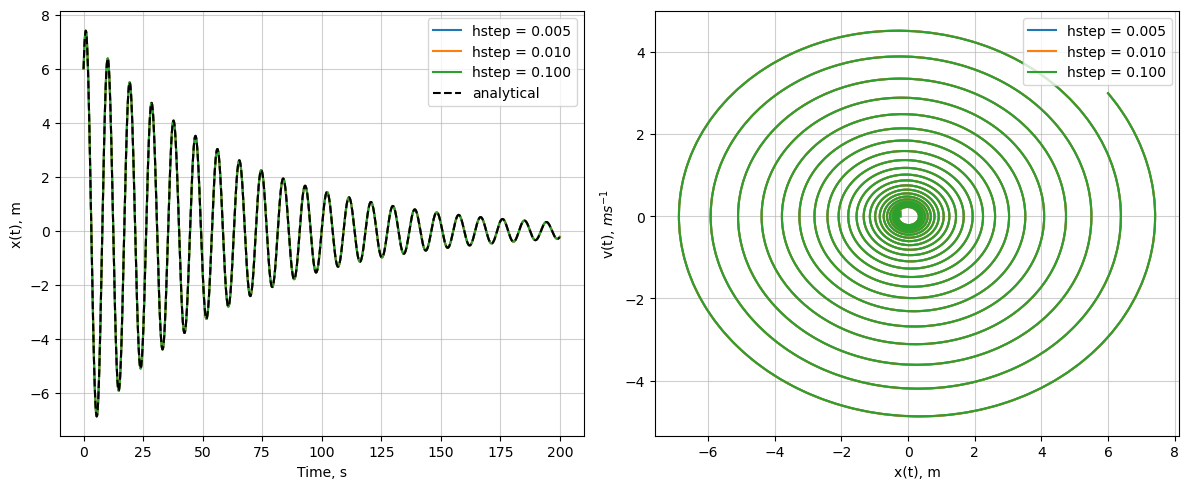

In [14]:
def verlets_method(x_0, v_0, x_1, v_1, step_iterations, stepsize, SPRING_CONSTANT, MASS, damping_constant, force, 
                   time1, time2, sinusoidal, frequency):
    """
    Calculates the numerical solution to the damped harmonic oscillator equation, and the forced one, using Verlet's method.
    Empty arrays are defined, then initial values of x and v, then A and B are calcuated for the particular system (they
    are constants). The iterative method follows the outline in the markdown cells above, and if and else statements are
    used in order to determine which version of Verlet's method to use. 
    
    Parameters:
    x_0 (float): Initial position, m.
    v_0 (float): Initial velocity, m/s.
    x_1 (float): First value of x calculated using the improved Euler method.
    v_1 (float): First value of v calculated using the improved Euler method.
    step_iterations (int): Number of steps to be carried out.
    stepsize (float): Size of step used in integration.
    SPRING_CONSTANT (float): Spring constant of system, N/m.
    MASS (float): Mass of object in system, kg.
    damping_constant (float): Damping constant of system, kg/s.
    force (float): Driving force, N.
    time(1-2): Times that the force is present between.
    sinusoidal (bool): True/False.
    frequency (float): Frequency of external driving force, Hz.
    
    Returns:
    (x, v) (tuple): Tuple of x, position and v, velocity arrays.
    e (array, float): The energy array of the system.
    """
    
    # Empty arrays corresponding to x, v, and time, to be put into for loops
    x = np.zeros(step_iterations)
    v = np.zeros(step_iterations)
    e = np.zeros(step_iterations)
    a = np.zeros(step_iterations)
    t = np.arange(0, step_iterations * stepsize, stepsize)  
    
    # Assign the initial conditions and the first values of x and v to these arrays
    x[0] = x_0
    v[0] = v_0
    x[1] = x_1
    v[1] = v_1
    e[0] = ((1/2) * SPRING_CONSTANT * x_0**2) + ((1/2) * MASS * v_0**2) 
    
    # Calculate the A and B constants
    A = 2 * ((2*MASS - SPRING_CONSTANT * stepsize**2) / (2*MASS + damping_constant*stepsize))
    B = (damping_constant*stepsize - 2*MASS) / (2*MASS + damping_constant*stepsize)
    
    # Perform the iterative method, starting at x[0].
    for index in range(1, step_iterations - 1):
        if sinusoidal:
            current_force = force * np.cos(frequency*(2*np.pi) * t[index])
        else:
            current_force = force

        if time1 <= t[index] <= time2 and current_force != 0: 
            x[index + 1] = A*x[index] + B*x[index-1] + (current_force / MASS)*(stepsize**2)
            v[index] = ( x[index + 1] - x[index - 1] ) / (2 * stepsize)
        else:
            x[index + 1] = A*x[index] + B*x[index-1]
            v[index] = ( x[index + 1] - x[index - 1] ) / (2 * stepsize)
            a[index] = - (SPRING_CONSTANT / MASS)*x[index] - (damping_constant / MASS)*v[index]
            e[index] = (1/4)*SPRING_CONSTANT*(x[index + 1] + x[index - 1]
                                              - stepsize**2*a[index])**2 + ((1/2)*MASS*v[index]**2)
        
    e = e[:-1]
    return (x, v), e

# Define different step sizes
h_tuple = (0.005, 0.01, 0.1)

# Define damping constant, kg/s
b = 0.08

# Define maximum integration time, s
T = 200

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for hstep in h_tuple:

    nsteps = int(T/hstep)
    
    (x_array, v_array), _, _, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
    first_x = x_array[1]
    first_v = v_array[1]
    (x_array, v_array), _ = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, 0, 0, 0, 0, 0)
    
    ax1.plot(np.arange(0, T, hstep), x_array, label=f"hstep = {hstep:.3f}")
    ax2.plot(x_array, v_array, label=f"hstep = {hstep:.3f}")
    
ax1.plot(np.arange(0, T, hstep), analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real, 'k--', label="analytical" )
ax1.set_xlabel('Time, s')
ax1.set_ylabel('x(t), m')
ax1.grid(alpha=0.6)
ax1.legend(loc='upper right')

ax2.set_xlabel('x(t), m')
ax2.set_ylabel(r'v(t), $ms^{-1}$')
ax2.grid(alpha=0.6)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Energy in Verlet's method**

We expect Verlet's method to be much better at conserving energy than either Euler method, as it is based on a centered derivative, and may actually conserve energy.

This relationship is investigated, once again, by substituting in expressions for the position and velocity from the equations used in Verlet's method,

$$
E_i = \frac{1}{2}kx_i^2+\frac{1}{2}mv_i^2.
$$

Plotting this relationship,

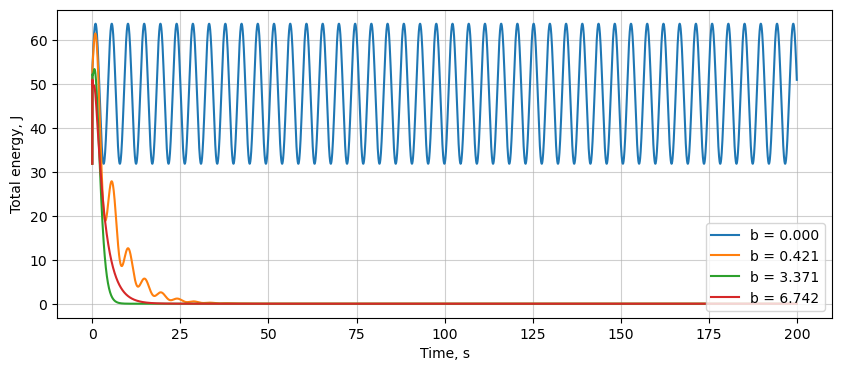

In [15]:
hstep = 0.05
nsteps = int(T/hstep)

b_array = [0, critical_damping / 8, critical_damping, critical_damping * 2]

fig, ax1 = plt.subplots(figsize=(10, 4))

for b in b_array:
    (x_array, v_array), _, _, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
    first_x = x_array[1]
    first_v = v_array[1]
    (x_array, v_array), energy_array = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, 0, 0, 0, 0, 0)

    ax1.plot(np.arange(0, T, hstep)[:-1], energy_array, label=f'b = {b:.3f}')
    
ax1.grid(True, alpha=0.6)
ax1.set_xlabel('Time, s')
ax1.set_ylabel('Total energy, J')
ax1.legend(loc='lower right')
plt.show()

The energy behaves as expected for each case, i.e. energy is conserved for no damping, energy slowly dies out in light damping, and the cases of critical damping and heavy damping are also well addressed. Verlet's method constantly updates each parameter and uses a centred derivative, meaning it is very accurate when it comes to energy and is described as a symplectic integrator, one that conserves energy.

## Euler-Cromer method

The Euler-Cromer method is a symplectic integrator, just like Verlet's method - with a few differences when it comes to the cases of critical and heavy damping.

For the Euler-Cromer method, a slight modification is made to the original Euler's method, 

$$
x_{i+1}=x_i+\color{red}{hv_{i+1}} \\
v_{i+1} = v_i - \frac{hk}{m}x_i
$$

This slight change ensures that the energy is approximately conserved, however there are oscillations about this average, as it is simply a correction.

Coding this method:

For hstep = 0.005, at time T = 200s, x = -0.226m, v = 0.132ms^-1.
For hstep = 0.010, at time T = 200s, x = -0.225m, v = 0.133ms^-1.
For hstep = 0.050, at time T = 200s, x = -0.217m, v = 0.134ms^-1.
For hstep = 0.090, at time T = 200s, x = -0.210m, v = 0.135ms^-1.


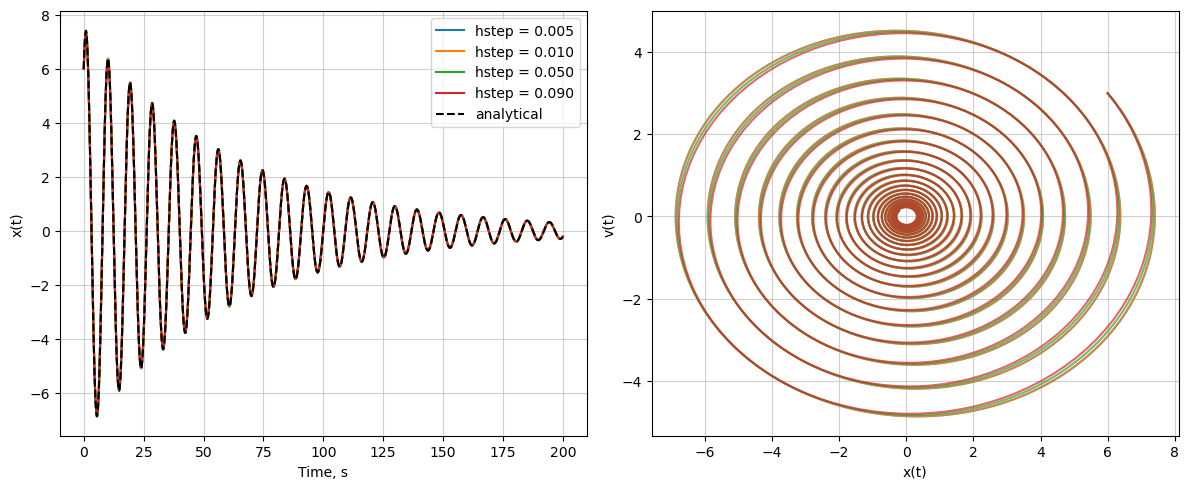

The analytical solution, at time T = 200s, predicts x = -0.230m.


In [16]:
def euler_cromer_method(x_0, v_0, step_iterations, stepsize, SPRING_CONSTANT, MASS, damping_constant):
    """
    Function that runs the Euler-Cromer method of numerical integration. A for loop is used to calculate acceleration at the ith step,
    and for each step, i, the later step in i+1 is calculated, for both x, m and v, m/s. A tuple of the position array
    and velocity array is returned, along with the last value in each array, which is the estimated solution at the final
    time, which can be equated to the upper limit of analytical integration. The difference between this and Euler's
    method is that an extra parameter of h*v_{i+1} is added on to the equation for x_{i+1}.
    
    Parameters:
    x_0 (float): The initial x-value of the system, m.
    v_0 (float): The initial velocity of the system, m/s.
    step_iterations (int): The number of steps to be performed in the Euler's method.
    stepsize (float): The size of each step in the Euler's method.
    SPRING_CONSTANT (float): The spring constant of the system, N/m.
    MASS (float): The mass of the object in the system, kg.
    damping_constant (float): The damping constant of the system, kg/s.

    Returns:
    (x, v) (tuple): Contains the x and v arrays corresponding to position, m, and velocity, m/s, at each step within the 
                    time range.
    last_value_x (float): The last value in the position array, which is the estimated position at the final time.
    last_value_v (float): The last value in the velocity array, which is the estimated velocity at the final time.
    e (array, float): The energy array of the system.
    """
    # Empty arrays corresponding to x and v, to be put into for loops
    x = np.zeros(step_iterations)
    v = np.zeros(step_iterations)
    e = np.zeros(step_iterations)
    
    # Assign initial conditions to the first index of each array
    x[0] = x_0
    v[0] = v_0
    e[0] = ((1/2) * SPRING_CONSTANT * x_0**2) + ((1/2) * MASS * v_0**2)
    
    # For loop in order to loop through all steps
    for i in range(step_iterations - 1):
        # Calculate acceleration at the current step
        acceleration = (-(SPRING_CONSTANT / MASS) * x[i]) - ((damping_constant / MASS) * v[i])
        
        # Update velocity using the Euler-Cromer method
        
        v[i + 1] = v[i] + acceleration * stepsize
        
        # Update position using the updated velocity
        x[i + 1] = x[i] + v[i + 1] * stepsize
        
        e[i + 1] = ((1/2) * SPRING_CONSTANT *
                    x[i]**2) + ((1/2) * MASS * v[i]**2) - ((1/2)*stepsize**2*((
            SPRING_CONSTANT**2*x[i]**2)/MASS) - SPRING_CONSTANT*v[i]**2) - stepsize**3*((
            SPRING_CONSTANT**2*x[i]*v[i])/(MASS)) + stepsize**4*((SPRING_CONSTANT**3*x[i]**2)/(2*MASS**2))
    # Return the arrays of position and velocity, along with the last values
    last_value_x = x[-1]
    last_value_v = v[-1]

    return (x, v), last_value_x, last_value_v, e

# Define damping constant, b
b = 0.08

# Define range of step sizes, h, in s
h_tuple = (0.005, 0.01, 0.05, 0.09)

# Create a subplot to display 2 figures side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# For loop - loops through each value of hstep
for hstep in h_tuple:
    # Defines nsteps as the number of iterations, must be an integer to ensure loop works
    nsteps = int(T/hstep)
    
    # Calls the iterative method
    (x, v), last_x, last_v, _ = euler_cromer_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
    
    # Plots a graph of position against time for each iteration of the numerical solution
    ax1.plot(np.linspace(0, T, nsteps), x, label=f"hstep = {hstep:.3f}")
    
    # Plots a graph of velocity against position
    ax2.plot(x, v, label=f"hstep = {hstep:.3f}", alpha=0.7)
    
    # Prints the last value of each x and v array, as this is the solution at T
    print(f"For hstep = {hstep:.3f}, at time T = {T}s, x = {last_x:.3f}m, v = {last_v:.3f}ms^-1.")

# Plots the analytical solution within the same time range as the numerical method
ax1.plot(np.arange(0, T, hstep), analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real, 'k--', label="analytical" )

ax1.legend()
ax1.set_xlabel('Time, s')
ax1.set_ylabel('x(t)')
ax1.grid(alpha=0.6)

ax2.set_xlabel('x(t)')
ax2.set_ylabel('v(t)')
ax2.grid(alpha=0.6)

plt.tight_layout()
plt.show()

print(f"The analytical solution, at time T = {T}s, predicts x = {analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real[-1]:.3f}m.")

**Energy behaviour in the Euler-Cromer method**

Quantifying the energy error, the same substitution for the energy is done as before, but this time using the Euler-Cromer equations, so that,

$$
E_{i+1} = E_i - \frac{1}{2}h^2\left(\frac{k^2x_i^2}{m}-kv_i^2\right) - h^3\left(\frac{k^2x_iv_i}{m}\right) + h^4\left(\frac{k^3x_i^2}{2m^2}\right).
$$

This is plotted below to achieve a clear explanation.

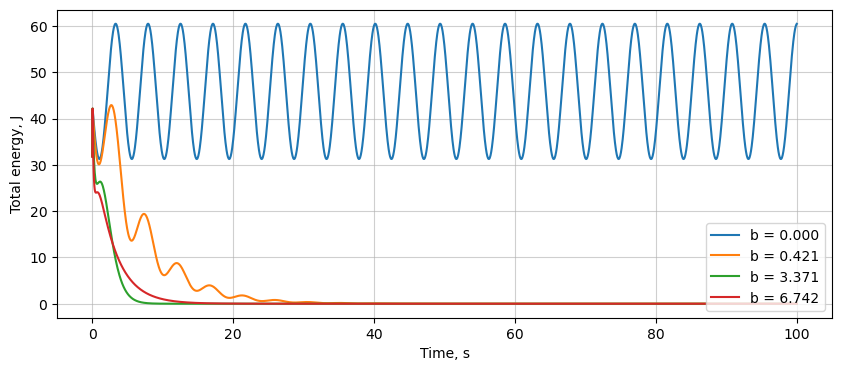

In [17]:
T = 100
hstep = 0.05
nsteps = int(T / hstep)

b_array = [0, critical_damping / 8, critical_damping, critical_damping * 2]

fig, ax1 = plt.subplots(figsize=(10, 4))

for b in b_array:
    _, _, _, energy_array = euler_cromer_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)

    ax1.plot(np.arange(0, T, hstep), energy_array, label=f'b = {b:.3f}')
    ax1.grid(True, alpha=0.6)
    ax1.set_xlabel('Time, s')
    ax1.set_ylabel('Total energy, J')
    
plt.legend(loc='lower right')
plt.show()

The above plot displays the energy behaving as expected. The Euler-Cromer method conserves energy, meaning it is a symplectic integrator. In the case of $b=0$, it behaves properly, and energy is conserved. In fact, the Euler-Cromer method has a slightly oscillating solution in the case of $b=0$, but the estimation is quite good. The cases of light, critical and heavy damping behave mostly as expected, with a few oscillations about the true energy in the case of heavy and critical damping, meaning this method is not well suited to cases where damping is above or equal to the critical value, or indeed, lightly damped oscillators close to $b=b_{cr}$.

## Further sources of error

**Estimated absolute error**

The error can be estimated through simply calculating the difference between Euler's method and the analytical solution at each step,

$$
\left|x_{num}(T)-x_{ana}(T)\right|.
$$

The average of this value over the entire step range can be taken and is a good estimate for the error due to step size. This is plotted for some chosen step sizes at each step $h$ on a log scale, for different values of $b$.

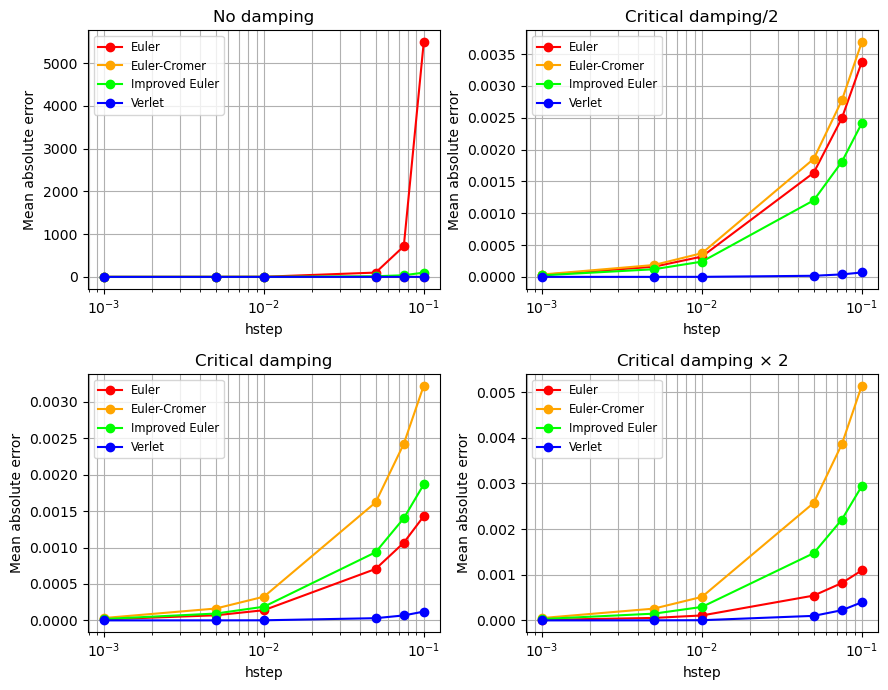

In [18]:
def error_fn(x_analytical, x_numerical):
    """
    Calculates the absolute error of a numerical integration method. Ensures the arrays are the same size as each
    other and proceeds to take the absolute difference between the analytical and numerical solution.
    
    Parameters:
    x_analytical (array, float): Array of solved x values, analytical
    x_numerical (array, float): Array of solved x values, numerical
    
    Returns:
    (array): The absolute difference between the two parameter arrays.
    """
    min_len = min(len(x_analytical), len(x_numerical))
    return np.abs(x_numerical[:min_len] - x_analytical[:min_len])


def mean_average_error(x_0, v_0, harray, barray, titles, T):   
    """
    Calculates the mean absolute error of a numerical integration method. Calls the error_fn() function for each method for
    each damping constant, and takes the mean of this array in order to obtain a value called the mean absolute error.
    Plots the mean absolute error against the step size for different damping constants for each method of numerical
    integration.
    
    Parameters:
    x_0 (float): The initial value of x, position, m.
    v_0 (float): The initial value of v, velocity, m/s.
    harray (array, float): An array of step sizes.
    barray (array, float): An array of b, damping constants, kg/s.
    titles (array, string): An array of titles for each plot.
    T (float): The total time to be integrated to, s.
    
    Returns:
    None
    
    """
    
    fig, axs = plt.subplots(2, 2, figsize=(9,7)) 
    axs = axs.flatten()  

    for i, b in enumerate(barray):

        empty_array_e = []
        empty_array_ec = []
        empty_array_ei = []
        empty_array_v = []

        for hstep in harray:

            nsteps = int(T/hstep)

            if b == critical_damping:
                x_ana = analytic_sol_critical(x_0, v_0, np.arange(0, T, hstep), b)

            elif b != critical_damping:
                x_ana = analytic_sol(x_0, v_0, np.arange(0, T, hstep), b).real

            # Euler's method
            (x_numeul, v_numeul), _, _, _ = eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
            error_2d_array_euler = error_fn(x_ana, x_numeul)
            average_error_euler = np.mean(error_2d_array_euler)
            empty_array_e.append(average_error_euler)

            # Improved Euler's method
            (x_numimp, v_numimp), _, _, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)

            #add if statement to get analytical solution whenever damping is critical
            error_2d_array_eulerimp = error_fn(x_ana, x_numimp)
            average_error_eulerimp = np.mean(error_2d_array_eulerimp)
            empty_array_ei.append(average_error_eulerimp)

            # Verlet's method
            first_x = x_numimp[1]
            first_v = v_numimp[1]
            (x_numv, v_numv), _ = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, 0, 0, 0, 0, 0)

            error_2d_array_verlet = error_fn(x_ana, x_numv)
            average_error_verlet = np.mean(error_2d_array_verlet)
            empty_array_v.append(average_error_verlet)

            # Euler-Cromer method
            (x_numec, v_numec), _, _, _ = euler_cromer_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
            error_2d_array_euler_cromer = error_fn(x_ana, x_numec)
            average_error_euler_cromer = np.mean(error_2d_array_euler_cromer)
            empty_array_ec.append(average_error_euler_cromer)

        axs[i].plot(harray, empty_array_e, '-o', color='red', label=f'Euler')
        axs[i].plot(harray, empty_array_ec, '-o', color='orange', label=f'Euler-Cromer')
        axs[i].plot(harray, empty_array_ei, '-o', color='lime', label=f'Improved Euler')
        axs[i].plot(harray, empty_array_v, '-o', color='blue', label=f'Verlet')
        axs[i].legend(loc='upper left',fontsize='small')
        axs[i].grid(True, which="both")
        axs[i].set_xscale('log')
        axs[i].set_xlabel('hstep')
        axs[i].set_ylabel('Mean absolute error')
        axs[i].set_title(titles[i])
        
    plt.tight_layout()
    plt.show()
    return None

h_array = np.array([10**(-3), 0.005, 10**(-2), 0.05, 0.075, 0.1])

b_array = np.array([0, critical_damping/2, critical_damping, 2*critical_damping])

T_end = 400

title_names = ['No damping', 'Critical damping/2', 'Critical damping', r'Critical damping $\times$ 2']

mean_average_error(x_0, v_0, h_array, b_array, title_names, T_end)

From these graphs, it can be seen that Verlet's method is the most accurate. This was expected already, as Verlet's method is a symplectic integrator - meaning, it conserves energy by default. It is the only method to act with a centered derivative, and also uses both an updated position and velocity to calculate its $x$ values, meaning it is more accurate.

The behaviour of Euler's method is quite interesting, as it is more accurate than the higher order improved Euler and Euler-Cromer methods when heavy damping occurs. Euler's method overestimates the position when the system is heavily damped, and this can result in a closer approximation to the true solution when heavy damping is involved. This is caused by Euler's method approximating in steps towards the derivative. On the other hand, Euler-Cromer updates the velocity beffore the position in each step, $h$, which makes it more accurate in oscillatory problems, for example in the case of light damping. This same property can make it less accurate in the case of heavy damping as energy conservation is less of a concern.

The Euler-Cromer method is second-best in the case of no damping, with error of order $10^{-3}$. Verlet's method still improves on this with an error of order $10^{-6}$ at the lowest $h$. Then, the method becomes the least accurate for every other case. This is because the Euler-Cromer method attempts to find an average for the energy, and becomes less accurate when energy conservation is not as important, i.e. in cases of damping that are relatively high.

The improved Euler method is also interesting to look at - It is only better than the Euler method whenever damping is light. This suggests that it conserves energy moreso than the Euler method, as a solution to light damping will require more conservation of energy rather than heavy damping.

**Behaviour of damping in Verlet's method**

A range of values of $b$, the damping constant, is set, so that the system displays no damping, light damping and heavy damping. In the case of no damping, oscillations should be self-sustaining, as energy is conserved, heavy damping should see the oscillations die out very quickly, and light damping should see the oscillations slowly dying away.

Investigating the effect of damping in Verlet's method for the case when $h = 0.005$,

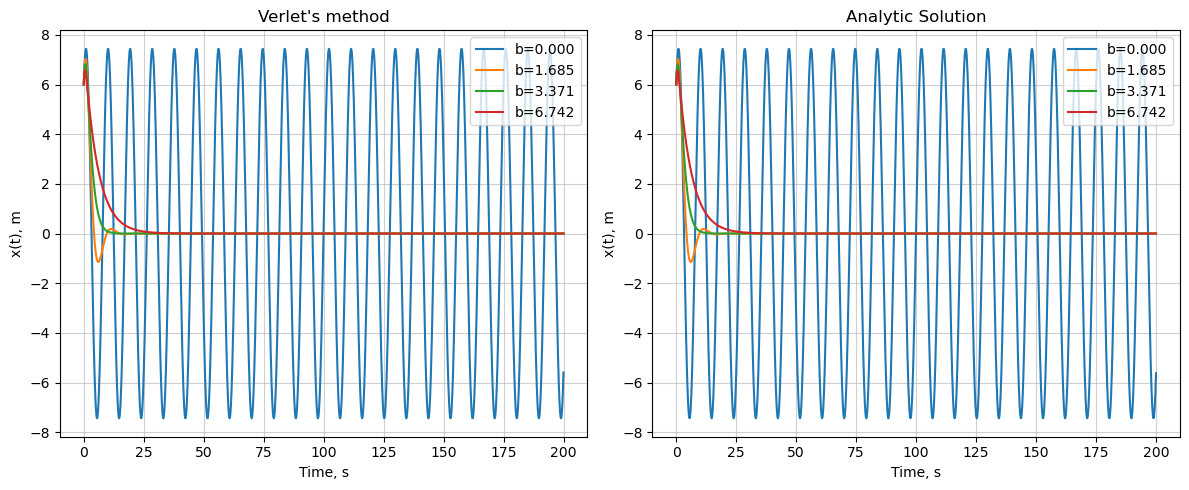

In [19]:
def analytic_solution_func(b, x_0, v_0, T, hstep):
    """
    Calculates the analytical solution, depending on whether critical, light or heavy damping is present.
    
    Parameters:
    b (float): Damping constant, kg/s.
    x_0 (float): The initial value of x, position, m.
    v_0 (float): The initial value of v, velocity, m/s.
    T (float): The total time to be integrated to, s.
    hstep (float): The step size.
    
    Returns:
    analytic_x_array (array): The analytical solution of x.
    """
    analytic_x_array = []
    
    for t in np.arange(0, T, hstep):
        if b == critical_damping:
            ana_x = analytic_sol_critical(x_0, v_0, t, b).real
        else:
            ana_x = analytic_sol(x_0, v_0, t, b).real
        
        analytic_x_array.append(ana_x)
    
    return analytic_x_array

def verlets_method_func(x_0, v_0, hstep, SPRING_CONSTANT, MASS, b_array, T):
    """
    Calculates the solution of x using Verlet's method for different damping constants, b, kg/s, then plots the solutions
    against time, and additionally plots the analytical solution of x in a second figure.
    
    Parameters:
    x_0 (float): The initial value of x, position, m.
    v_0 (float): The initial value of v, velocity, m/s.
    hstep (float): The step size.
    SPRING_CONSTANT (float): The spring constant of the system, N/m.
    MASS (float): The mass of the system, kg.
    b_array (array, float): Array of damping constant values, kg/s.
    T (float): The total time to be integrated to, s.
    
    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  

    # define nsteps
    nsteps = int(T/hstep)

    # loop for values of b
    for b in b_array:
        (x_array, v_array), _, _, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
        first_x = x_array[1]
        first_v = v_array[1]
        (x_array, _), _ = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, 0, 0, 0, 0, 0)
        
        ax1.plot(np.arange(0, T, hstep), x_array, label=f'b={b:.3f}')

    # loop for values of b for analytic solution
    for b in b_array:
        analytic_x_array = analytic_solution_func(b, x_0, v_0, T, hstep)
        ax2.plot(np.arange(0, T, hstep), analytic_x_array, label=f'b={b:.3f}')  
    
    ax1.set_xlabel('Time, s')
    ax1.set_ylabel('x(t), m')
    ax1.grid(alpha=0.6)
    ax1.legend(loc='upper right')
    ax1.set_title("Verlet's method")

    ax2.grid(alpha=0.6)
    ax2.set_xlabel('Time, s')
    ax2.set_ylabel('x(t), m')
    ax2.legend(loc='upper right')
    ax2.set_title('Analytic Solution')

    plt.tight_layout()
    plt.show()
    return None

hstep = 0.05

b_array = (0, critical_damping/2, critical_damping, 2*critical_damping)

T = 200

verlets_method_func(x_0, v_0, hstep, SPRING_CONSTANT, MASS, b_array, T)

In the case of zero damping, Verlet's method performs very well. It has self-sustaining oscillations, which is what is expected analytically. The plots appear to be very similar, and this is the result that was expected given the absolute error found, where Verlet's method had an error that was of the order $10^{-3}$ for each case of damping. Therefore, going forward, Verlet's method will always be used to demonstrate the behaviour of the damped harmonic oscillator.

## Forced Oscillations

**Analytical solution**

The analytical solution for a forced oscillator depends on the form of the driving force. The solution will change dependent on this. Two types of driving forces were investigated, and their analytical solutions are summarised below.

**Constant "push"**

If $F(t)$ is a constant, the damped oscillator equation will have the following form,

$$
a + \frac{b}{m}v + \frac{k}{m}x = \frac{F_0}{m},
$$

where all variables retain their original meaning, and $F_0$ is a constant driving force. This will have a solution of the form

$$
x = \left(exp\left(\frac{-bt}{2m}\right)\right)\left(A\,exp\left(\frac{it\sqrt{4km-b^2}}{2m}\right)+B\,exp\left(\frac{-it\sqrt{4km-b^2}}{2m}\right)\right)\, + \frac{F_0}{k}.
$$

Something worth noting about this solution is that the analytical solution will not be correct after the force is applied, as it does not account for any change in initial conditions. Therefore, since it is hard to obtain, the analytical solution will not be plotted alongside the numerical in this case. It is also very difficult, even more so, to obtain a solution when the force is applied for a long period of time.

**Sinusoidal driving force**

If $F(t)$ is set to be sinusoidal, in this scenario, $F(t) = F_0\,cos(\omega t)$, the solution for $x$ will change to reflect this. Calculating the solution is also more complicated, as a particular integral needs to be considered to account for the non-homogeneous term. The equation of motion changes to 

$$
a + \frac{b}{m}v+\frac{k}{m}x=\frac{F_0}{m}exp\left(i\omega t\right),
$$

and the solution to this is found by making the equation homogeneous, solving, and adding the particular integral for a sinusoidal non-homogeneous term. The driving force has been changed to be complex to make the equation easier to solve. The real part of this solution will correspond to $F(t) = F_0\,cos(\omega t)$. The resulting solution is found to be

$$
x(t) = Acos\left(\omega t - \theta\right) + exp\left(-\frac{b}{2\sqrt{km}}\omega_0{t}\right)\left[Bcos(\omega_d{t})+Csin(\omega_d{t})\right],
$$

$$
\begin{align*}
 A &= \dfrac{F_0}{\sqrt{m^2\left(\omega_0^2-\omega^2\right)^2+\left(b\omega\right)^2}} & \theta &= tan^{-1}\left(\dfrac{b\omega}{\left(k-m\omega^2\right)}\right), \\ \\
 \omega_d & = \omega_0 \sqrt{1-\frac{b^2}{4km}}.
\end{align*}
$$

The terms that have been expanded upon have physical meaning - $\theta$ is the phase lag of the oscillations behind the driving force, and $A$ is the amplitude of the oscillations. The natural frequency, $\omega_0$, retains its original meaning as $\omega_0 = \sqrt{(k/m)}$. The constants $B$ and $C$ are determined by initial boundary conditions. Coding this in as a function:

In [20]:
def sinusoidalf_analytic_sol(x_initial, v_initial, max_force, frequency, damping, time):
    """
    Calculates the analytical solution to a sinusoidally forced damped harmonic oscillator, in accordance with the
    above markdown cell. The constants B and C are determined by the initial conditions.
    
    Parameters:
    x_initial (float): The initial position value, m.
    v_initial (float): The initial velocity value, m/s.
    max_force (float): The maximum amount of force, N.
    frequency (float): The frequency of the driving force, Hz.
    damping (float): The damping constant, b, kg/s.
    time (float): The time at which to calculate x, s.
    
    Returns:
    X (float): Amplitude of oscillations, m.
    A (float): Maximum amplitude of oscillations, m.
    """
    angfrequency = (2*np.pi) * frequency
    A = (max_force) / (np.sqrt(MASS**2 * ( (SPRING_CONSTANT / MASS) - angfrequency**2 )**2 + (damping * angfrequency)**2))
    theta = np.arctan((damping*angfrequency) / (SPRING_CONSTANT - MASS*(angfrequency**2)))
    damped_frequency = np.sqrt(SPRING_CONSTANT / MASS) * np.sqrt(1 - ((damping**2) / (4*SPRING_CONSTANT*MASS)) )
    
    B = x_initial - A * np.cos(theta)
    C = (v_initial + A * angfrequency * np.sin(theta)) / damped_frequency
    
    exponential_t = np.exp(-((damping)/(2*np.sqrt(SPRING_CONSTANT*MASS))) * np.sqrt(SPRING_CONSTANT/MASS) * time)
    sinusoidal_t = B * np.cos(damped_frequency*time) + C * np.sin(damped_frequency*time)
                       
    X = A * np.cos(angfrequency*time - theta) +  exponential_t*sinusoidal_t
    return X, A

**Numerical solution - Verlet**

Verlet's method can be modified in order to include a driving force term, $F(t)$. This term can be added at any point into the cycle, and will be investigated in the region $t_1<t<t_2$. The way in which it is modified is by using the acceleration from the previous derivation with the force term included, so that

$$
a_i = -\frac{k}{m}x_i - \frac{b}{m}v_i + \frac{F_i}{m}.
$$

This is then substituted into the equation for $x_i$ as before, and the new equation used to define Verlet's method is

$$
x_{i+1} = Ax_i + Bx_{i-1} + \frac{F_i}{m}h^2,
$$

where $A = 4m - 2kh^2/D$ and $B = bh-2m\, / D$, where $D = 2m+bh$. This forcing term can be added at any point in the cycle, and a demonstration will be made at three separate points, with a few different driving forces being tested.

## Sudden Application of a force

**Constant "push"**

The forcing term in this section will be $F(t) = F_0$. The analytical method is displayed alongside the result obtained using Verlet's method.

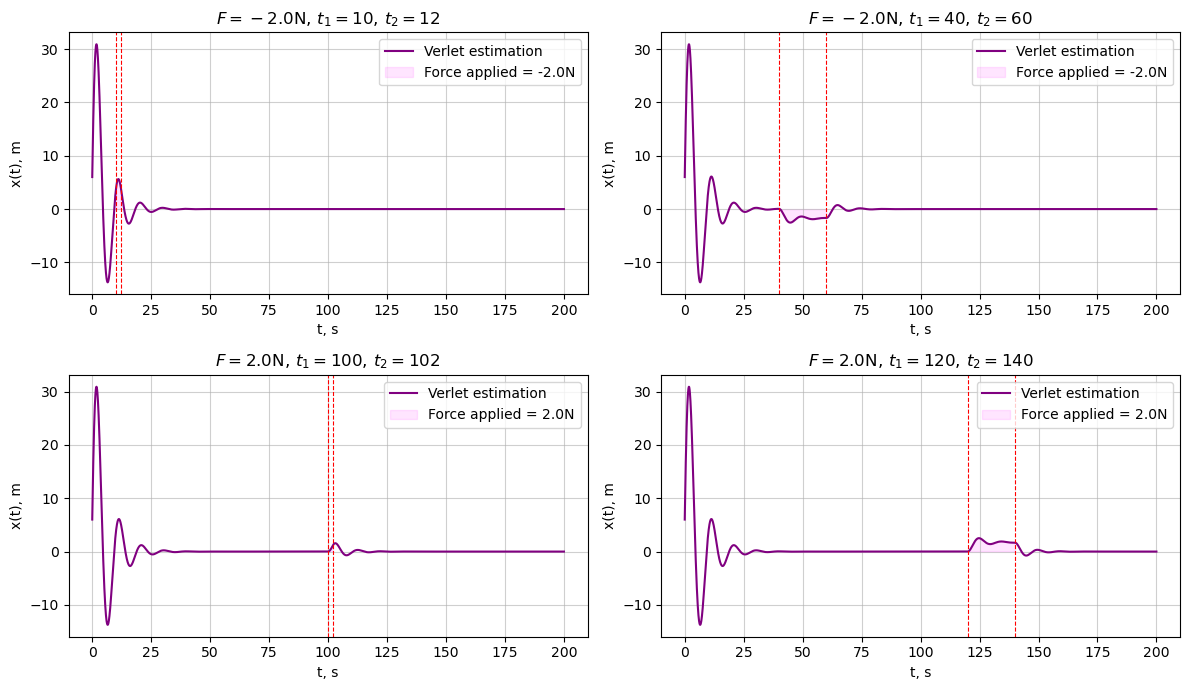

In [21]:
def constant_force_num(x_0, v_0, hstep, force, b, T, the_time1, the_time2):
    """
    Applies Verlet's method to a system that has a constant force, N, applied between two times, and flips the sign of the
    force for 2 plots. Plots all four systems in a 2x2 subplot.
    
    Parameters:
    x_0 (float): The initial value of x, position, m.
    v_0 (float): The initial value of v, velocity, m/s.
    hstep (float): The step size.
    force (float): The magnitude of force applied to the system, N.
    b (float): Damping constant, kg/s.
    T (float): The total time to be integrated to, s.
    the_time(1-2) (float): The times that the force is applied between.
    
    Returns:
    None
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 7)) 
    axs = axs.flatten()

    nsteps = int(T/hstep)
    for i in range(len(the_time1)):
        value1 = the_time1[i]
        value2 = the_time2[i]

        force = -2.00 if i < 2 else 2.00

        # Run the numerical integration
        (x_array, v_array), _ = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, force, value1, value2, False, 0)

        # Plotting values
        axs[i].plot(np.arange(0, T, hstep), x_array, color='purple', label=f'Verlet estimation')
        axs[i].grid(alpha=0.6)
        axs[i].set_xlabel('t, s')
        axs[i].set_ylabel('x(t), m')
        axs[i].set_title(f'$F={force}\mathrm{{N}},\, t_1 = {value1},\, t_2 = {value2} $')

        axs[i].axvline(x=value1, color='r', linestyle='--', linewidth=0.8)
        axs[i].axvline(x=value2, color='r', linestyle='--', linewidth=0.8)
        axs[i].fill_between(np.arange(value1, value2, hstep), x_array[int(value1/hstep):int(value2/hstep)], color='magenta', alpha=0.1, label=f'Force applied = {force}N')
        axs[i].legend(loc='upper right')
    plt.tight_layout() 
    plt.show()
    return None

hstep = 0.005

b = (critical_damping/4)

T = 200 

the_time1 = [10, 40, 100, 120] 
the_time2 = [12, 60, 102, 140]

force = 2

constant_force_num(x_0, v_0, hstep, force, b, T, the_time1, the_time2)

The analytic solution does not account for the disturbance after the force is finished being applied. This is because the initial conditions are no longer correct - it can be modelled using Verlet's method, but the analytical solution does not take into account the push after it is over. Without any tweaking at all, the forced damped harmonic oscillator analytical solution cannot model a constant push. It can be seen when the force is negative, the amplitude of the oscillation simply flips into the negative $x(t)$ domain.

**Sinusoidal "push"**

The second type of push investigated is a push of the form $f(t)=cos(\omega{t})$

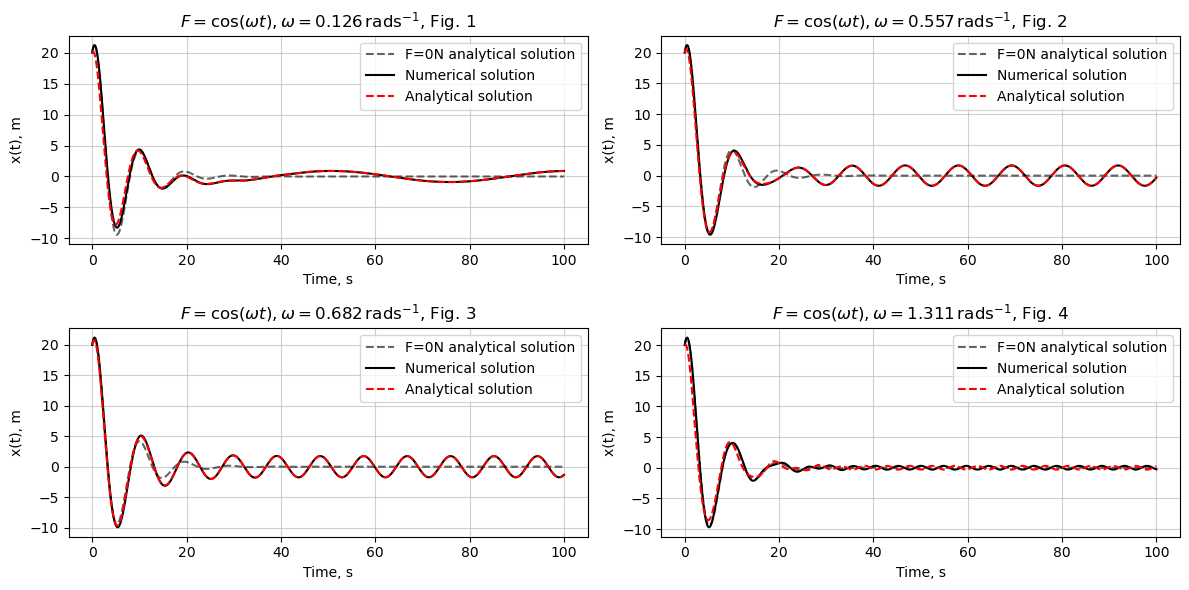

In [22]:
import warnings
warnings.filterwarnings('ignore')

def forced_damped_sinu(x_0, v_0, hstep, frequency_array, max_force, b, T):
    """
    x_0 (float): The initial value of x, position, m.
    v_0 (float): The initial value of v, velocity, m/s.
    hstep (float): The step size.
    frequency_array (array, float): Frequencies of the driving force, Hz.
    max_force (float): The maximum magnitude of force applied to the system, N.
    b_array (array, float): Array of damping constant values, kg/s.
    T (float): The total time to be integrated to, s.
    """
    nsteps = int(T/hstep)

    fig, axs = plt.subplots(2, 2, figsize=(12, 6)) 
    axs = axs.flatten()

    for i, frequency in enumerate(frequency_array):

        (x_array, v_array), _, _, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
        first_x = x_array[1]
        first_v = v_array[1]

        (x_num_array,_), _ = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, max_force, 0, T, True, frequency)

        x_array_notforced = analytic_sol(x_0, v_0, np.arange(0, T, hstep), b)
        x_array, _ = sinusoidalf_analytic_sol(x_0, v_0, max_force, frequency, b, np.arange(0, T, hstep))
        
        # Plotting these results
        axs[i].plot(np.arange(0, T, hstep), x_array_notforced, linestyle='--', color='black', alpha=0.6, label='F=0N analytical solution')
        axs[i].grid(True, alpha=0.6)
        axs[i].plot(np.arange(0, T, hstep), x_num_array, color='black', label='Numerical solution')
        axs[i].plot(np.arange(0, T, hstep), x_array, linestyle='--', alpha=1, color='red', label='Analytical solution')
        axs[i].set_xlabel('Time, s')
        axs[i].set_ylabel('x(t), m')
        axs[i].grid(True, alpha=0.6)
        axs[i].legend(loc='upper right')
        axs[i].set_title(fr'$F = \mathrm{{cos}}(\omega{{t}}), \omega={frequency*2*np.pi:.3f}\,\mathrm{{rads^{{-1}}}}$, Fig. {i+1}')

    plt.tight_layout()    
    plt.show()
    return None

hstep = 0.005

x_0 = 20
v_0 = 5

b = (critical_damping/4)

T = 100

max_force = 1

frequency_array = [0.02, NATURAL_FREQUENCY / (2*np.pi) - 0.02, NATURAL_FREQUENCY / (2*np.pi),
                   NATURAL_FREQUENCY / (2*np.pi) + 0.1]

forced_damped_sinu(x_0, v_0, hstep, frequency_array, max_force, b, T)

The transient periods in a sinusoidally forced damped harmonic oscillator describe the interference between the oscillations of the driving force and the oscillations of the system itself. Therefore, some constructive and destructive wave interference can be seen - this occurs when two waves are in phase or out of phase, respectively. The exponential term in the analytic solution accounts for this, and Verlet's method seems to cope well with it below the natural frequency.

The angular frequency, $\omega$, is equal to the natural frequency in Fig. 3. The remaining plots are varying magnitudes of $\omega$. Figure 1 and 2 display transients,  when $\omega < \omega_0$. The transient period is perhaps the most clear in these two figures. The analytic and numerical solutions seem to mostly agree with each other,  with the numerical solution slightly overshooting in Fig. 1, and undershooting in Fig. 2. This is due to the limitation of the step size, if it was smaller, these issues would not occur. Figure 3, $\omega = \omega_0$, shows the two sources of oscillation constructively interfering when they are in phase, to create an oscillation with larger amplitude overall. In figure 4, $\omega > \omega_0$, the numerical and analytical solutions are slightly out of phase. Whenever $\omega > \omega_0$, the code for Verlet's method changes $F(t)$ to $F(t)=F_0\mathrm{sin}(\omega t)$ - this is to account for the $\pi\,\mathrm{rad}$ phase shift that occurs at resonant frequency, $\omega_0$. Otherwise, Verlet's method would not take the phase shift into account, and would be out of phase with the analytic solution.

The accuracy of the numerical solution also appears to depend on initial conditions, and is quite sensitive to them.

## Resonance

The amplitude behaviour at different frequencies is described as a resonance plot, with the resonance of the system itself being defined as the amplitude at the natural frequency, which is the maximum amplitude the system can have. A resonance plot is plotted for this system below, along with the dependency on frequency of the phase.

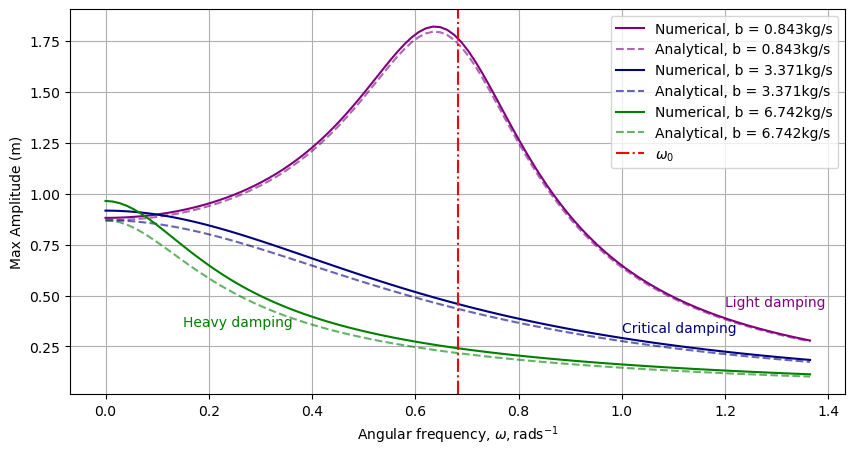

In [23]:
def resonance_plot(min_freq, max_freq, num_freqs, x_0, v_0, hstep, SPRING_CONSTANT, MASS, b_array, max_force, T):
    """
    Creates a resonance plot by running the verlets_method function with varying frequencies.
    
    Parameters:
    min_freq (float): Minimum frequency to test.
    max_freq (float): Maximum frequency to test.
    num_freqs (int): Number of frequency values to test.
    other_parameters (tuple): Other parameters to pass to the verlets_method function.
    
    Returns:
    None
    """
    nsteps = int(T/hstep)
    # Create an array of frequencies to test
    frequencies = np.linspace(min_freq, max_freq, num_freqs)
    
    # Create an array to store the maximum amplitudes
    max_amplitudes = np.zeros(num_freqs)
    max_amplitudes_ana = np.zeros(num_freqs)
    
    # Create a time array
    t = np.arange(0, T, hstep)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    color_map = {b_array[0]: 'purple', b_array[1]: 'navy', b_array[2]: 'green'}
    
    for b in b_array:
        (x_array_imp, v_array_imp), _, _, _ = improved_eulers_method(x_0, v_0, nsteps, hstep, SPRING_CONSTANT, MASS, b)
        first_x = x_array_imp[1]
        first_v = v_array_imp[1]
        # Loop over the frequencies
        for i in range(num_freqs):
            # Run the simulation with the current frequency
            (x, v), _ = verlets_method(x_0, v_0, first_x, first_v, nsteps, hstep, SPRING_CONSTANT, MASS, b, max_force, 0, T, sinusoidal=True, frequency=frequencies[i])

            # Select the x values between two times
            x_selected = x[(t >= 200) & (t <= 300)]

            # Store the maximum amplitude
            max_amplitudes[i] = np.max(np.abs(x_selected))

            _, A = sinusoidalf_analytic_sol(x_0, v_0, max_force, frequencies[i], b, t[len(t) - 1]) 
            max_amplitudes_ana[i] = A

        # Create the resonance plot
        ax.plot(frequencies*(2*np.pi), max_amplitudes, label=f'Numerical, b = {b:.3f}kg/s', color=color_map[b])
        ax.plot(frequencies*(2*np.pi), max_amplitudes_ana, label=f'Analytical, b = {b:.3f}kg/s', linestyle='--', color=color_map[b], alpha=0.6)
        ax.set_xlabel(r'Angular frequency, $\omega, \mathrm{rads^{-1}}$')
        ax.set_ylabel('Max Amplitude (m)')
        ax.grid(True)
    
    ax.axvline(x=NATURAL_FREQUENCY, linestyle='-.', color='red', label='$\omega_0$')
    ax.legend(loc='upper right')
    ax.text(1, 0.32, 'Critical damping', color='navy')
    ax.text(1.2, 0.45, 'Light damping', color='purple')
    ax.text(0.15, 0.35, 'Heavy damping', color='green')
    plt.show()
    return None

T = 300
hstep = 0.08
b_array = [critical_damping / 4, critical_damping, critical_damping*2]
resonance_plot(0, NATURAL_FREQUENCY/(np.pi), 100, x_0, v_0, hstep, SPRING_CONSTANT, MASS, b_array, max_force, T)

The resonance plot created by Verlet's method is resonably accurate compared to the analytical plot. It overestimates the solution, as the step size has been increased to decrease computation time. The error on Verlet's method with this step size is still quite small, as seen previously in the mean average error plots. The effect of damping on the amplitude is accurately calculated, and the characteristic shift from $\omega_0$, the natural frequency, is seen. The behaviour of the above graph is displayed once the transient period is over, and steady oscillations are observed.

The maximum amplitude is observed at $\omega_0$ when there is no damping, but generally, it shifts from $\omega_0$. Its new position is described as the *resonant frequency, $\omega_{res}$,* of the system. This is dependent on the damping of the system, as observed above.

## Conclusions

Verlet's method was much more accurate than the other methods of integration, and modelled both the unforced and forced damped harmonic oscillator very accurately. There was a slight deviation from the solution in the sinusoidally forced harmonic oscillator, but this is expected unless the step size is very small, as the system is very sensitive, especially close to its resonant frequency. 

Euler and improved Euler had a lot of issues with energy conservation, so were not ideal for this system. The Euler-Cromer method performed well when there was zero or very light damping, but ultimately became worse than even the other Euler methods in cases of heavier damping. 

Ultimately, the accuracy of each method was dependent on the energy and order of the method, for example, the first-order Euler method performed worse than the second-order Verlet algorithm. This was made clear from the outset, as the derivations for each method involved Taylor expanding to a certain order, but the results were benchmarked using this system in which the analytical solution was known. 